# Proyecto 1

In [1]:
#!pip install sknw
#!pip install opencv-python
#!pip install opencv-contrib-python

from skimage.morphology import skeletonize
from skimage import data
import sknw
import cv2
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import json

C:\Users\osjom\anaconda3\Lib\site-packages\paramiko\transport.py:219: CryptographyDeprecationWarning: Blowfish has been deprecated
  "class": algorithms.Blowfish,


## Problema 2

In [2]:
def generate_graph(img_path):
    img = cv2.imread(img_path, -1)
    ske = skeletonize(img)

    graph = sknw.build_sknw(ske)
    G = nx.Graph()
    counter = 0
    
    for (s,e) in graph.edges():

        ps = graph[s][e]['pts'][::8]

        ps_edges = np.concatenate((graph.nodes[s]['o'].reshape((1, 2)), ps, graph.nodes[e]['o'].reshape((1, 2))), axis=0)

        u, ind = np.unique(ps_edges, axis=0, return_index=True)

        result_array = u[np.argsort(ind)]

        node_index = None
        for node, attrs in G.nodes(data=True):
            if 'coords' in attrs and np.array_equal(attrs['coords'], result_array[0]):
                node_index = node
                break

        if node_index:
            n_prev = node_index
        else:
            G.add_node(counter, coords=result_array[0])
            n_prev = counter
            counter += 1

        for i in range(len(result_array)-1):
            node_index = None
            for node, attrs in G.nodes(data=True):
                if 'coords' in attrs and np.array_equal(attrs['coords'], result_array[i+1]):
                    node_index = node
                    break

            if node_index:
                G.add_edge(n_prev, node_index)
                n_prev = node_index
            else:
                G.add_node(counter, coords=result_array[i+1])
                G.add_edge(n_prev, counter)
                n_prev = counter
                counter += 1

    return G

In [3]:
def display_graph_info(G, original_img_path, result_img_path, info_path):
    img = cv2.imread(original_img_path, -1)
    extremos = [{"id": node, "coords": tuple(np.flip(G.nodes[node]["coords"]))} for node in G.nodes() if G.degree(node) == 1]
    intermedios = [{"id": node, "coords": tuple(np.flip(G.nodes[node]["coords"]))} for node in G.nodes() if G.degree(node) == 2]
    bifurcaciones = [{"id": node, "coords": tuple(np.flip(G.nodes[node]["coords"]))} for node in G.nodes() if G.degree(node) == 3]
    trifurcaciones = [{"id": node, "coords": tuple(np.flip(G.nodes[node]["coords"]))} for node in G.nodes() if G.degree(node) >= 4]
    nodos = extremos + intermedios + bifurcaciones + trifurcaciones
    
    graph_dict = {
        "nodos": [{"id": node["id"], "coords": str(node["coords"])} for node in nodos],
        "extremos": [node["id"] for node in extremos],
        "bifurcaciones": [node["id"] for node in bifurcaciones],
        "trifurcaciones": [node["id"] for node in trifurcaciones],
        "nodos_intermedios": [node["id"] for node in intermedios],
        "aristas": list(G.edges())
    }
    
    display(graph_dict)
    
    fig, ax = plt.subplots(1, 2, figsize=(9, 4), sharey=True, sharex=True)

    ax[0].imshow(img, cmap='gray', origin='lower', aspect='equal')
    ax[1].set_facecolor("black")

    ax[1].set_xlim([0, img.shape[0]])
    ax[1].set_ylim([0, img.shape[1]])

    for (s, e) in G.edges():
        ax[1].plot([G.nodes[s]["coords"][1], G.nodes[e]["coords"][1]],
                   [G.nodes[s]["coords"][0], G.nodes[e]["coords"][0]],
                   c="yellow", linewidth=1, zorder=0)
        ax[1].scatter([G.nodes[s]["coords"][1], G.nodes[e]["coords"][1]],
                      [G.nodes[s]["coords"][0], G.nodes[e]["coords"][0]],
                      c="gray", s=10, zorder=1, alpha=0.5)
    
    extremos = np.array([node['coords'] for node in extremos])
    bifurcaciones = np.array([node['coords'] for node in bifurcaciones])
    trifurcaciones = np.array([node['coords'] for node in trifurcaciones]) 
    
    if len(extremos) > 0:
        ax[1].scatter(extremos[:, 0], extremos[:, 1], c="green", s=25, zorder=2, alpha=0.8)
        
    if len(bifurcaciones) > 0:
        ax[1].scatter(bifurcaciones[:, 0], bifurcaciones[:, 1], c="red", s=25, zorder=2, alpha=0.8)
    
    if len(trifurcaciones) > 0:
        ax[1].scatter(trifurcaciones[:, 0], trifurcaciones[:, 1], c="blue", s=25, zorder=2, alpha=0.8)
    
    plt.savefig(result_img_path)
    
    with open(info_path, 'w') as fp:
        json.dump(graph_dict, fp)

{'nodos': [{'id': 0, 'coords': '(157, 3)'},
  {'id': 9, 'coords': '(184, 3)'},
  {'id': 48, 'coords': '(141, 136)'},
  {'id': 70, 'coords': '(208, 163)'},
  {'id': 80, 'coords': '(142, 199)'},
  {'id': 93, 'coords': '(157, 239)'},
  {'id': 1, 'coords': '(155, 11)'},
  {'id': 2, 'coords': '(153, 19)'},
  {'id': 3, 'coords': '(154, 27)'},
  {'id': 4, 'coords': '(156, 35)'},
  {'id': 5, 'coords': '(164, 42)'},
  {'id': 6, 'coords': '(171, 50)'},
  {'id': 7, 'coords': '(178, 58)'},
  {'id': 10, 'coords': '(186, 11)'},
  {'id': 11, 'coords': '(188, 19)'},
  {'id': 12, 'coords': '(189, 27)'},
  {'id': 13, 'coords': '(191, 35)'},
  {'id': 14, 'coords': '(192, 43)'},
  {'id': 15, 'coords': '(191, 51)'},
  {'id': 16, 'coords': '(184, 59)'},
  {'id': 17, 'coords': '(172, 64)'},
  {'id': 18, 'coords': '(164, 64)'},
  {'id': 19, 'coords': '(156, 63)'},
  {'id': 20, 'coords': '(148, 62)'},
  {'id': 21, 'coords': '(140, 60)'},
  {'id': 22, 'coords': '(132, 58)'},
  {'id': 23, 'coords': '(124, 56)'},

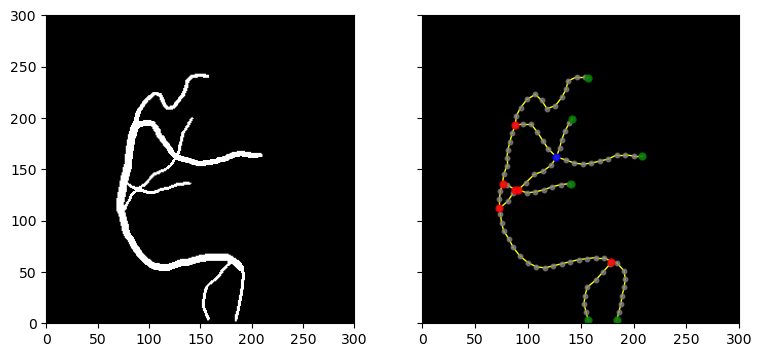

In [4]:
G = generate_graph('database/1_gt.pgm')
display_graph_info(G, 'database/1_gt.pgm', 'results/1_gt_graph.png', 'results/1_gt_graph_info.json')

{'nodos': [{'id': 0, 'coords': '(140, 15)'},
  {'id': 3, 'coords': '(16, 16)'},
  {'id': 14, 'coords': '(153, 48)'},
  {'id': 43, 'coords': '(107, 74)'},
  {'id': 56, 'coords': '(98, 138)'},
  {'id': 84, 'coords': '(130, 229)'},
  {'id': 85, 'coords': '(105, 233)'},
  {'id': 1, 'coords': '(132, 20)'},
  {'id': 4, 'coords': '(21, 24)'},
  {'id': 6, 'coords': '(125, 23)'},
  {'id': 7, 'coords': '(117, 27)'},
  {'id': 8, 'coords': '(109, 30)'},
  {'id': 9, 'coords': '(102, 32)'},
  {'id': 10, 'coords': '(130, 31)'},
  {'id': 11, 'coords': '(132, 39)'},
  {'id': 12, 'coords': '(139, 45)'},
  {'id': 13, 'coords': '(147, 47)'},
  {'id': 15, 'coords': '(32, 31)'},
  {'id': 17, 'coords': '(23, 37)'},
  {'id': 18, 'coords': '(24, 45)'},
  {'id': 19, 'coords': '(25, 53)'},
  {'id': 20, 'coords': '(26, 61)'},
  {'id': 21, 'coords': '(28, 69)'},
  {'id': 22, 'coords': '(29, 77)'},
  {'id': 23, 'coords': '(33, 85)'},
  {'id': 24, 'coords': '(35, 93)'},
  {'id': 25, 'coords': '(39, 101)'},
  {'id': 

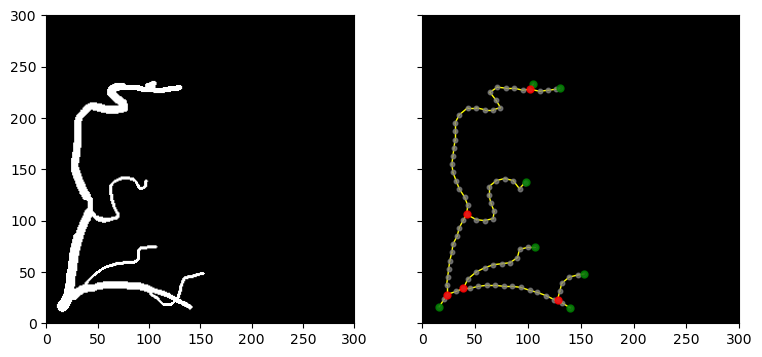

In [5]:
G = generate_graph('database/8_gt.pgm')
display_graph_info(G, 'database/8_gt.pgm', 'results/8_gt_graph.png', 'results/8_gt_graph_info.json')

{'nodos': [{'id': 0, 'coords': '(114, 34)'},
  {'id': 11, 'coords': '(114, 34)'},
  {'id': 37, 'coords': '(294, 174)'},
  {'id': 38, 'coords': '(114, 34)'},
  {'id': 64, 'coords': '(4, 46)'},
  {'id': 107, 'coords': '(206, 230)'},
  {'id': 150, 'coords': '(74, 205)'},
  {'id': 164, 'coords': '(269, 276)'},
  {'id': 175, 'coords': '(163, 267)'},
  {'id': 179, 'coords': '(99, 268)'},
  {'id': 1, 'coords': '(105, 33)'},
  {'id': 2, 'coords': '(97, 32)'},
  {'id': 3, 'coords': '(89, 31)'},
  {'id': 4, 'coords': '(81, 31)'},
  {'id': 5, 'coords': '(73, 32)'},
  {'id': 6, 'coords': '(65, 34)'},
  {'id': 7, 'coords': '(57, 38)'},
  {'id': 8, 'coords': '(49, 39)'},
  {'id': 9, 'coords': '(41, 40)'},
  {'id': 12, 'coords': '(123, 32)'},
  {'id': 13, 'coords': '(131, 32)'},
  {'id': 14, 'coords': '(139, 34)'},
  {'id': 15, 'coords': '(147, 36)'},
  {'id': 16, 'coords': '(155, 40)'},
  {'id': 17, 'coords': '(163, 43)'},
  {'id': 18, 'coords': '(171, 46)'},
  {'id': 19, 'coords': '(179, 53)'},
  {

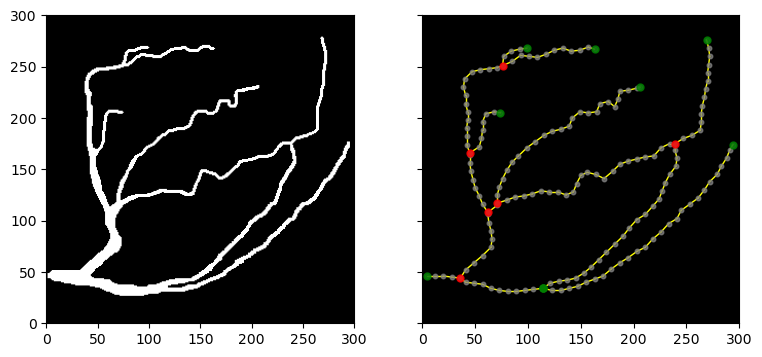

In [6]:
G = generate_graph('database/12_gt.pgm')
display_graph_info(G, 'database/12_gt.pgm', 'results/12_gt_graph.png', 'results/12_gt_graph_info.json')

{'nodos': [{'id': 0, 'coords': '(66, 33)'},
  {'id': 2, 'coords': '(66, 33)'},
  {'id': 10, 'coords': '(122, 55)'},
  {'id': 27, 'coords': '(68, 100)'},
  {'id': 43, 'coords': '(64, 188)'},
  {'id': 81, 'coords': '(296, 227)'},
  {'id': 99, 'coords': '(267, 238)'},
  {'id': 112, 'coords': '(205, 245)'},
  {'id': 1, 'coords': '(71, 33)'},
  {'id': 4, 'coords': '(80, 36)'},
  {'id': 5, 'coords': '(88, 39)'},
  {'id': 6, 'coords': '(96, 43)'},
  {'id': 7, 'coords': '(104, 47)'},
  {'id': 8, 'coords': '(112, 52)'},
  {'id': 9, 'coords': '(120, 54)'},
  {'id': 11, 'coords': '(54, 40)'},
  {'id': 12, 'coords': '(47, 48)'},
  {'id': 13, 'coords': '(42, 56)'},
  {'id': 14, 'coords': '(39, 64)'},
  {'id': 15, 'coords': '(37, 72)'},
  {'id': 16, 'coords': '(35, 80)'},
  {'id': 17, 'coords': '(34, 88)'},
  {'id': 19, 'coords': '(65, 43)'},
  {'id': 20, 'coords': '(67, 51)'},
  {'id': 21, 'coords': '(69, 59)'},
  {'id': 22, 'coords': '(65, 67)'},
  {'id': 23, 'coords': '(67, 75)'},
  {'id': 24, 'c

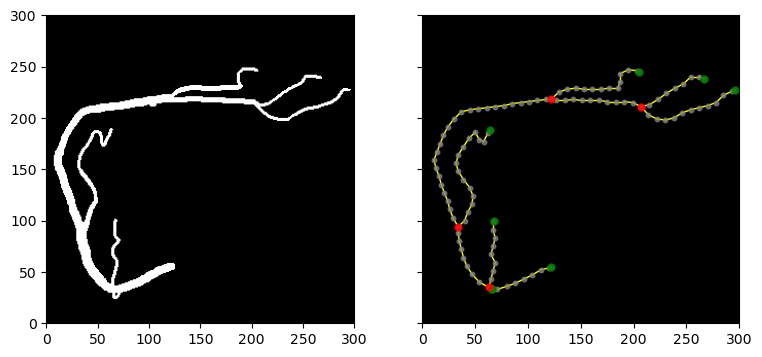

In [7]:
G = generate_graph('database/16_gt.pgm')
display_graph_info(G, 'database/16_gt.pgm', 'results/16_gt_graph.png', 'results/16_gt_graph_info.json')

{'nodos': [{'id': 0, 'coords': '(120, 36)'},
  {'id': 5, 'coords': '(120, 36)'},
  {'id': 15, 'coords': '(200, 38)'},
  {'id': 38, 'coords': '(238, 100)'},
  {'id': 59, 'coords': '(197, 133)'},
  {'id': 95, 'coords': '(221, 200)'},
  {'id': 97, 'coords': '(117, 204)'},
  {'id': 109, 'coords': '(155, 270)'},
  {'id': 1, 'coords': '(112, 42)'},
  {'id': 2, 'coords': '(104, 46)'},
  {'id': 3, 'coords': '(96, 51)'},
  {'id': 4, 'coords': '(88, 55)'},
  {'id': 6, 'coords': '(129, 36)'},
  {'id': 7, 'coords': '(137, 36)'},
  {'id': 8, 'coords': '(145, 36)'},
  {'id': 9, 'coords': '(153, 36)'},
  {'id': 10, 'coords': '(161, 38)'},
  {'id': 11, 'coords': '(169, 40)'},
  {'id': 12, 'coords': '(177, 41)'},
  {'id': 13, 'coords': '(185, 41)'},
  {'id': 14, 'coords': '(193, 41)'},
  {'id': 17, 'coords': '(77, 65)'},
  {'id': 18, 'coords': '(76, 66)'},
  {'id': 19, 'coords': '(86, 68)'},
  {'id': 20, 'coords': '(87, 76)'},
  {'id': 21, 'coords': '(91, 84)'},
  {'id': 22, 'coords': '(99, 92)'},
  {'

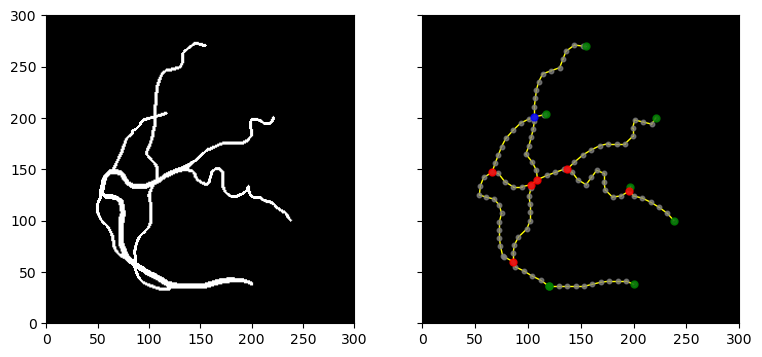

In [8]:
G = generate_graph('database/11_gt.pgm')
display_graph_info(G, 'database/11_gt.pgm', 'results/11_gt_graph.png', 'results/11_gt_graph_info.json')